<a href="https://www.kaggle.com/code/debbiechu/fraud-detection-for-credit-card-transaction-record?scriptVersionId=169353853" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Purpose

Utilize unsupervised and supervised learning techniques to detect fraud transactions. Goal is to **minimize the false negatives** as much as possible, because misclassifying a fraudulent transaction as non-fraudulent is more detrimental. 

## Dataset

In [5]:
# read data
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# no missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Classes
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

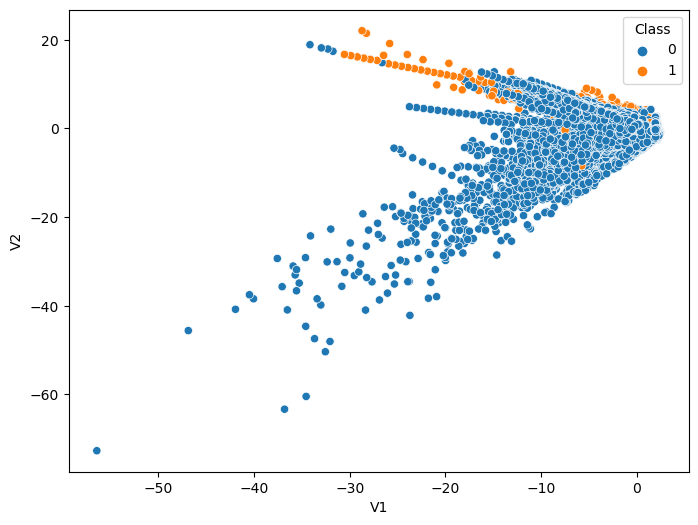

In [9]:
# visualize the imbalanced data using the first 2 variables

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='V1', y='V2', hue='Class')
plt.show()

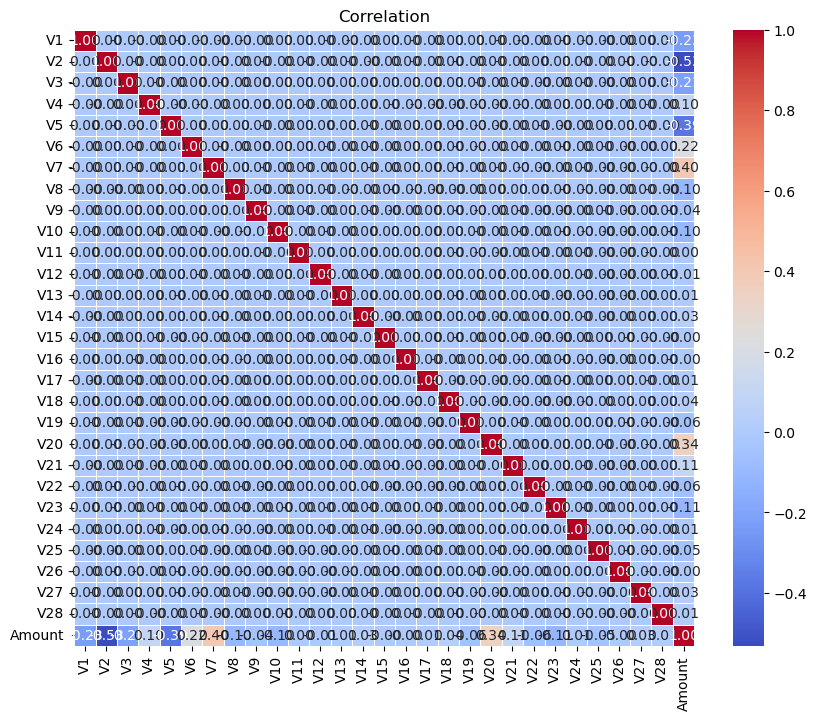

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('Class', axis=1)
X_notime = X.drop('Time', axis=1)
y = df[['Class']]

# calculate correlation between variables
cor = X_notime.corr()

# plot correlation
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation')
plt.show()

Most of the variables have weak negative correlation with each other, while some has moderate positive correlation.

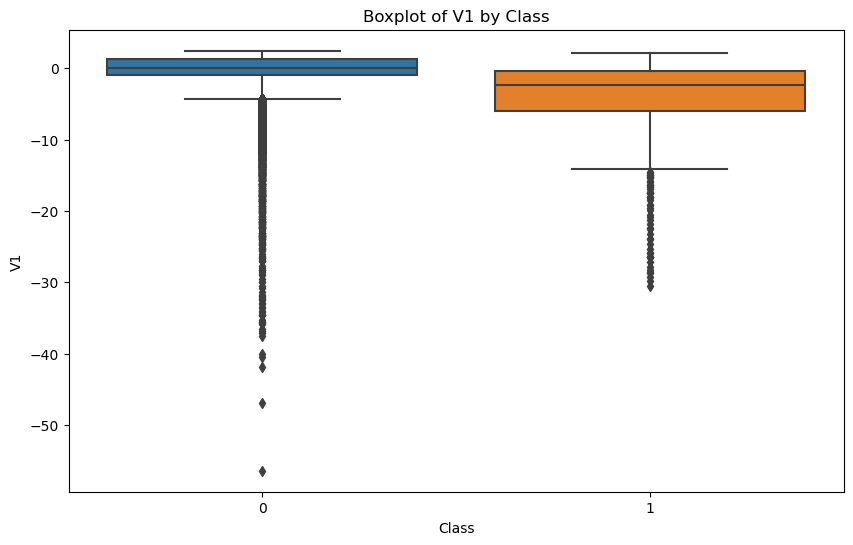

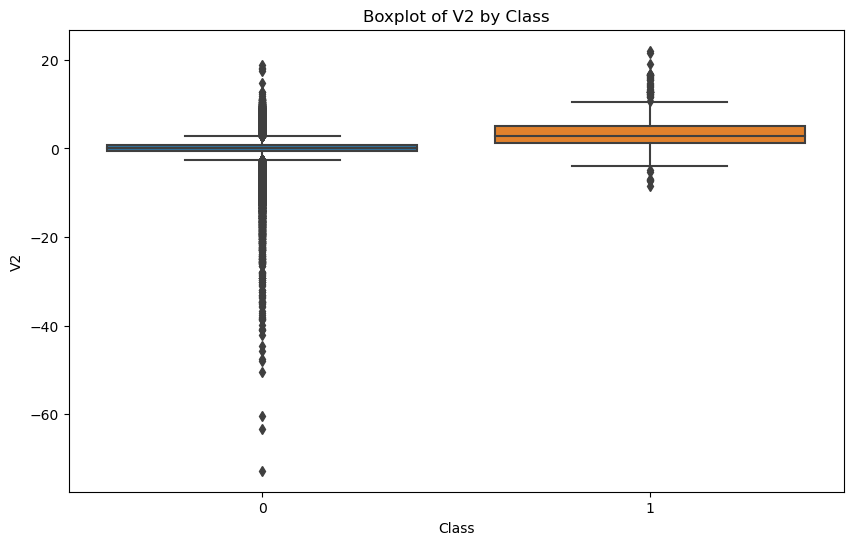

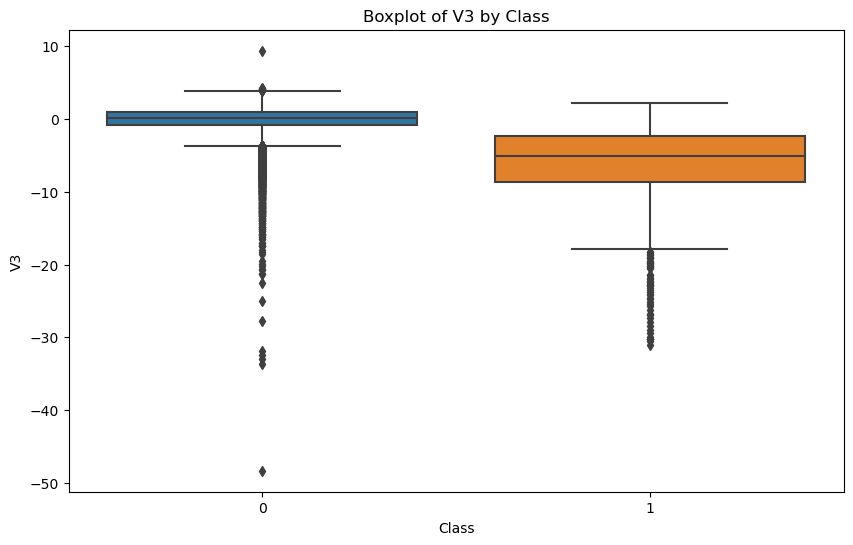

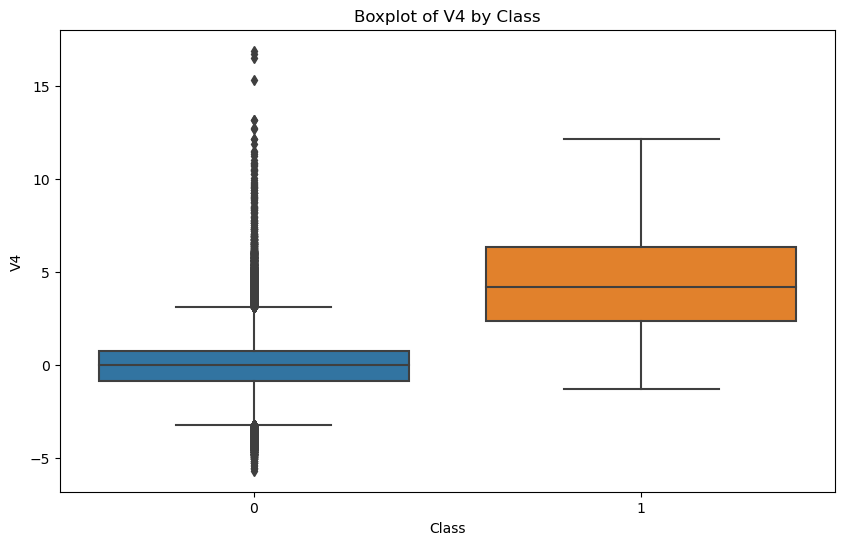

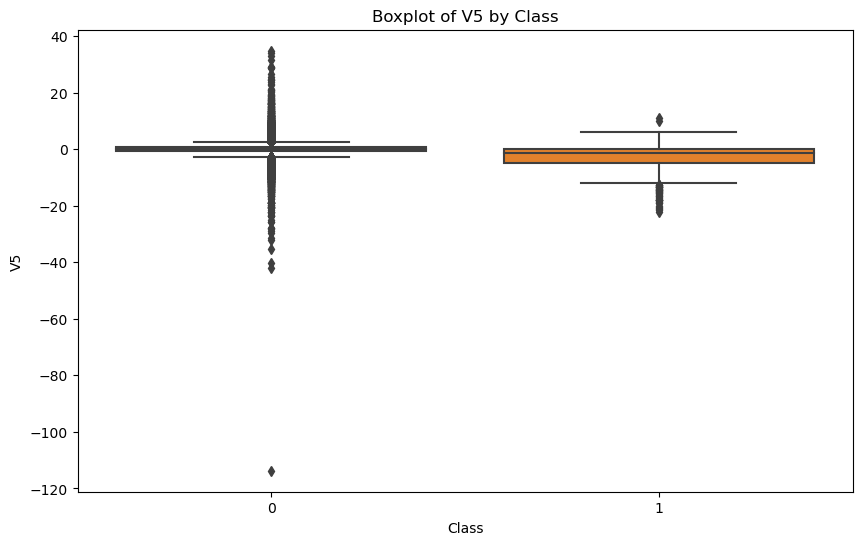

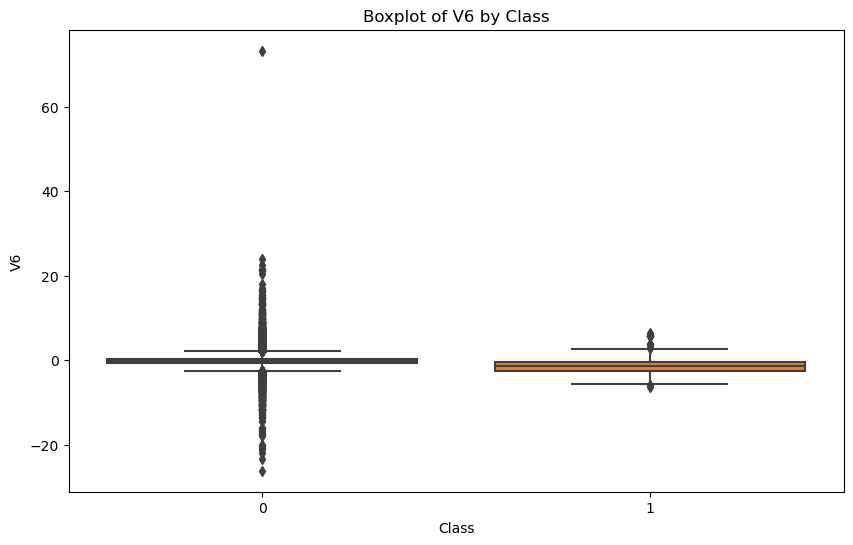

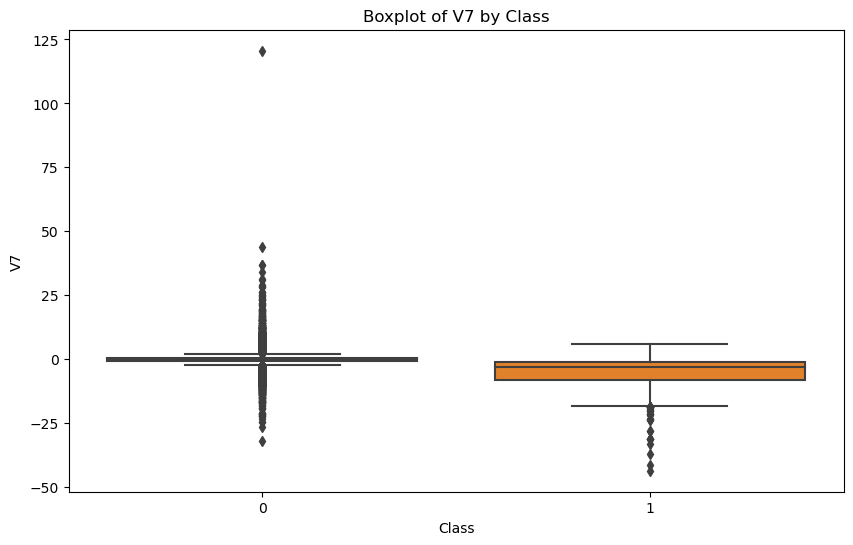

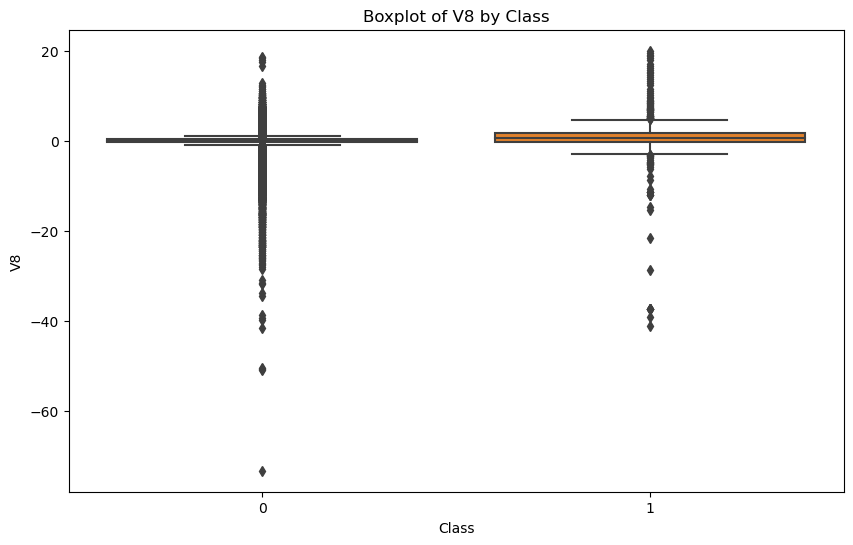

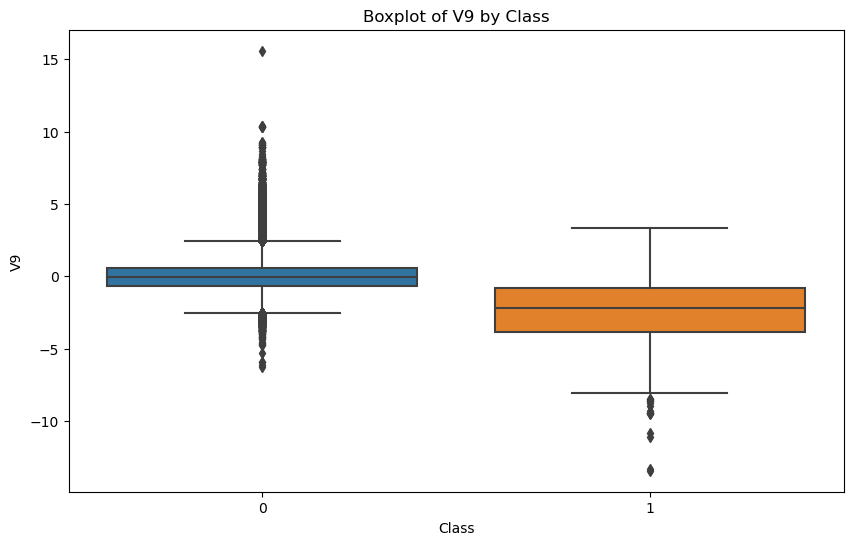

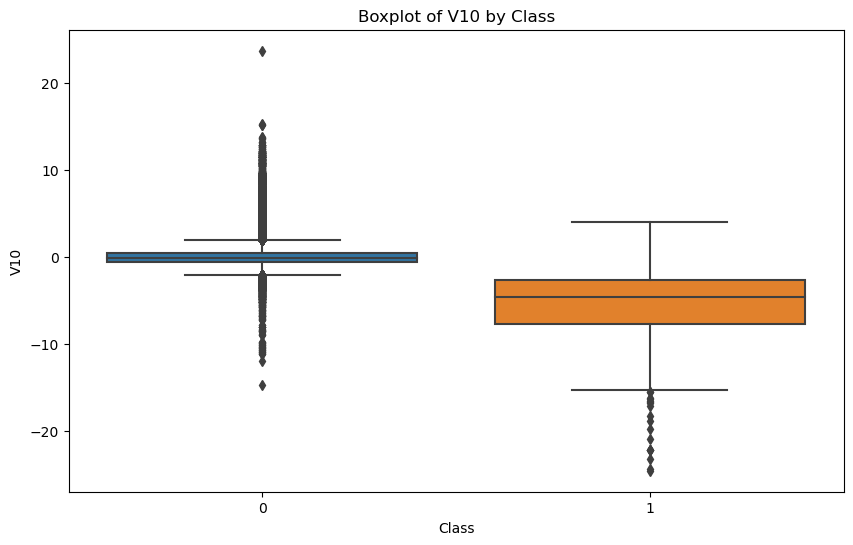

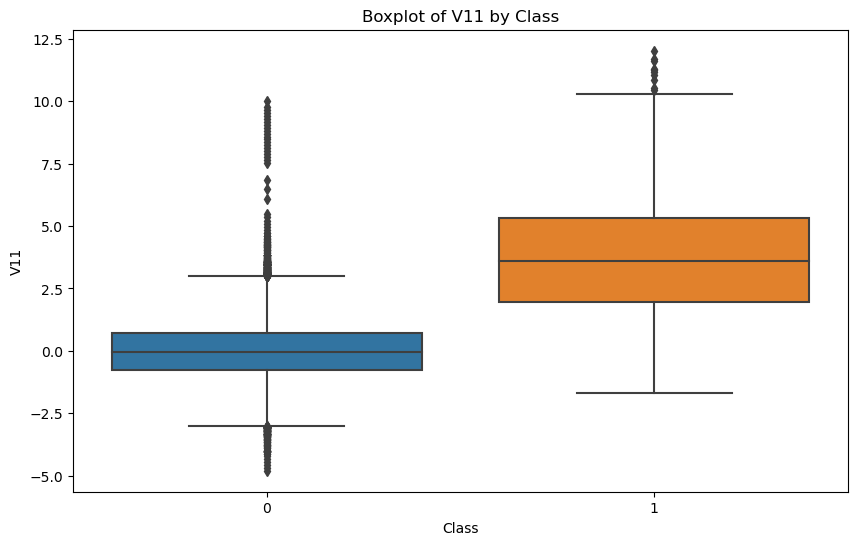

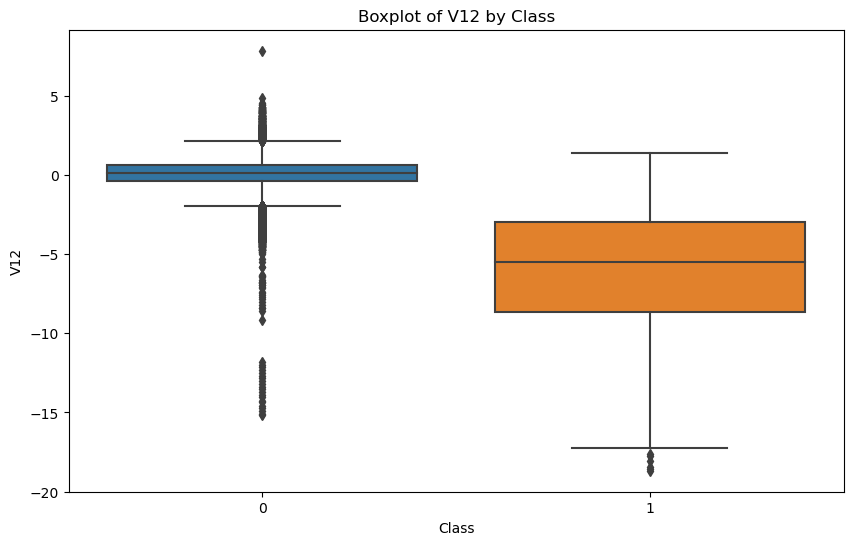

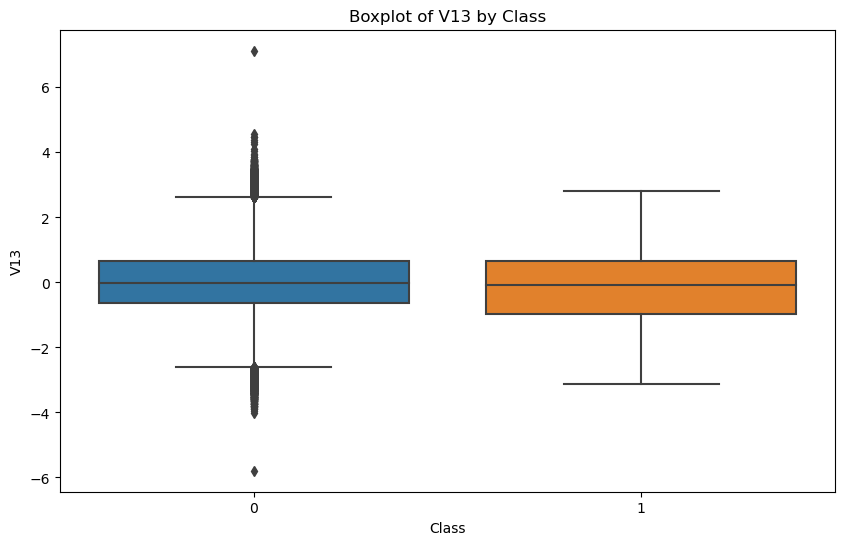

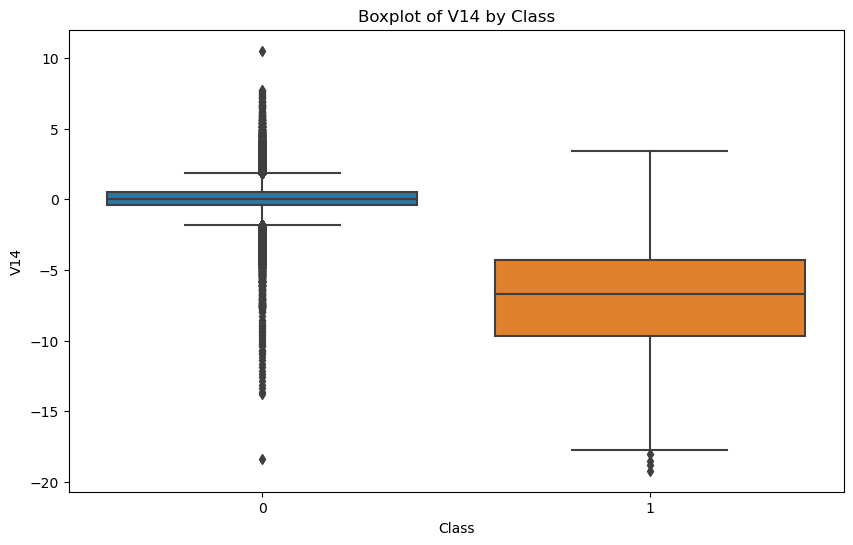

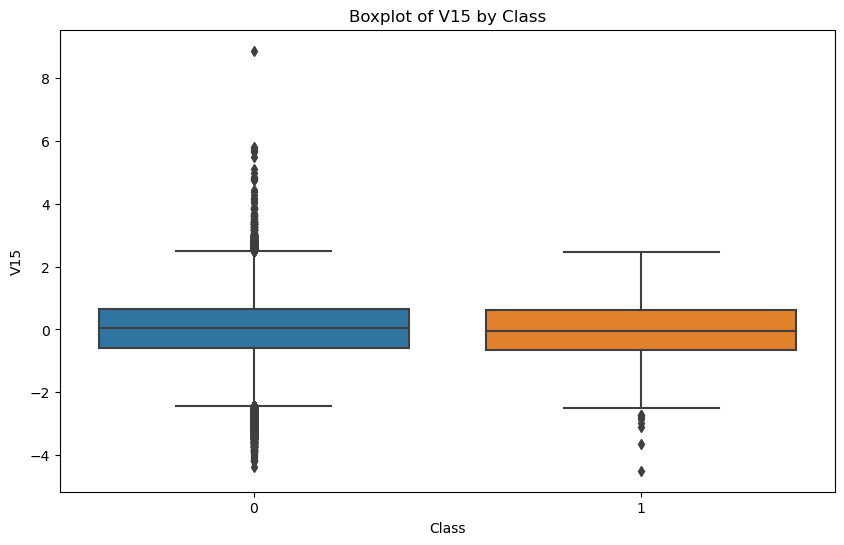

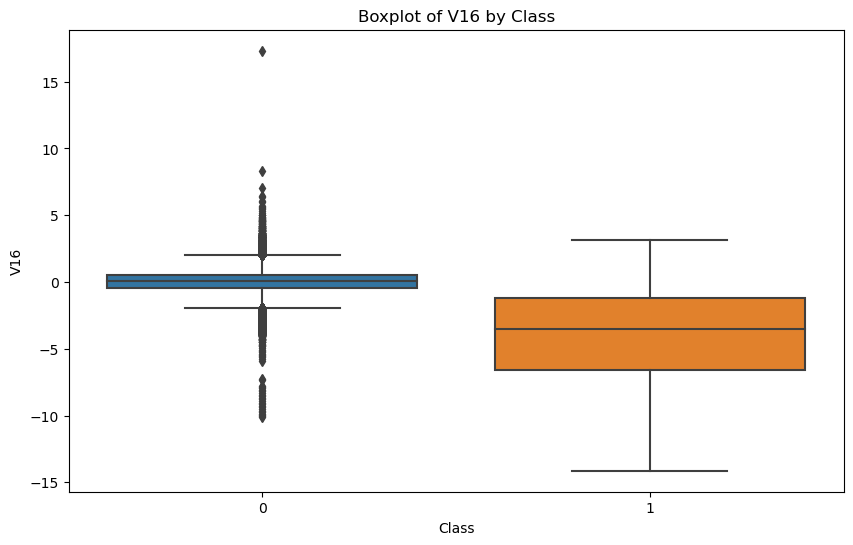

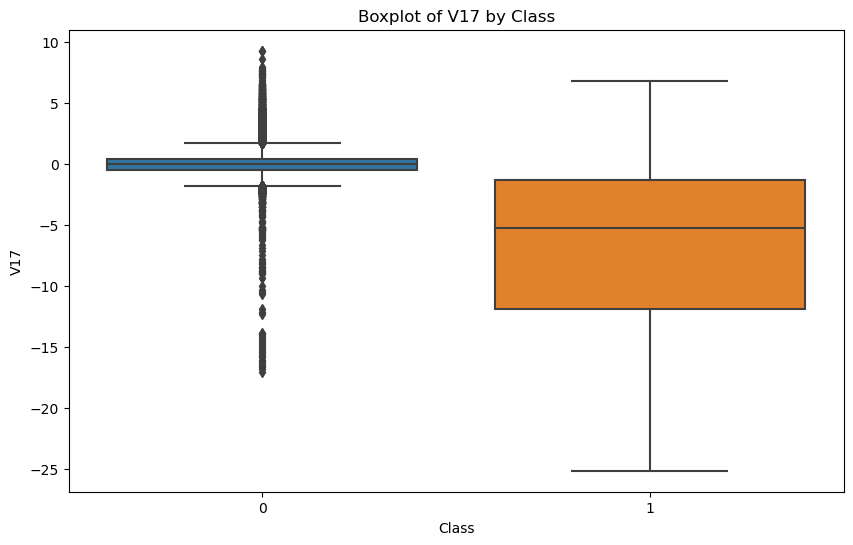

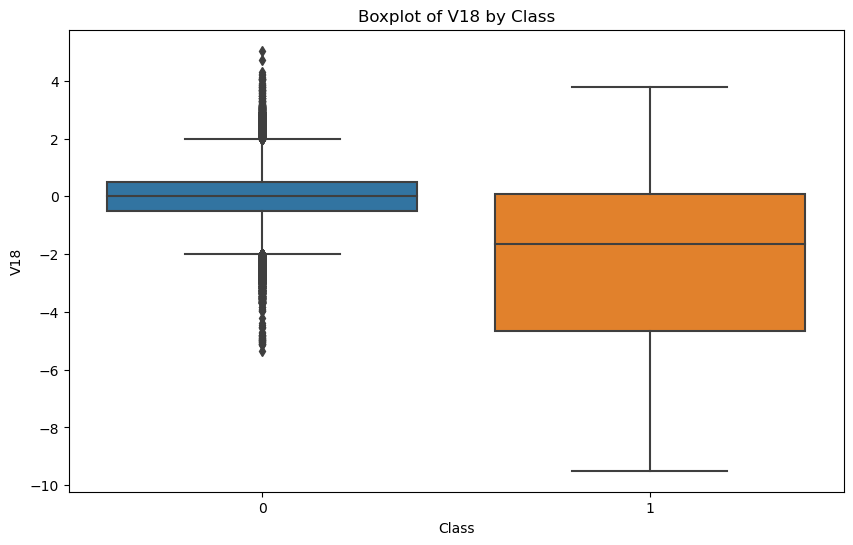

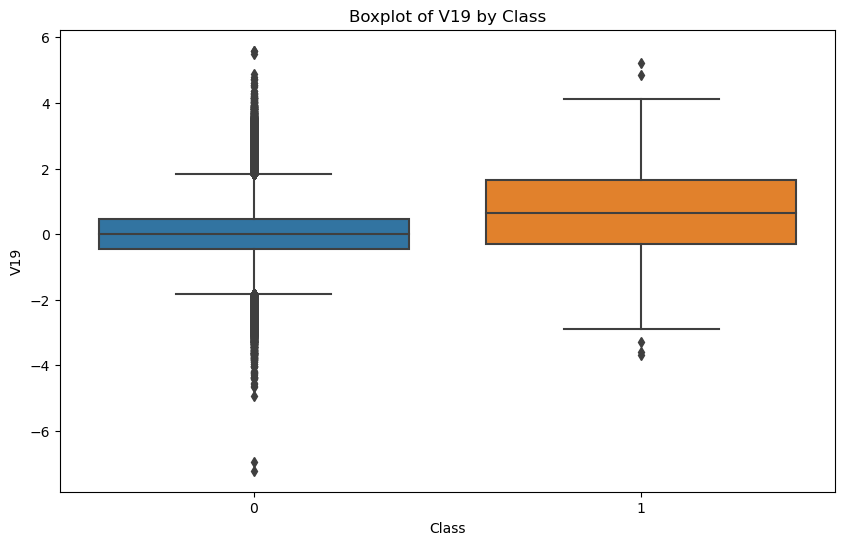

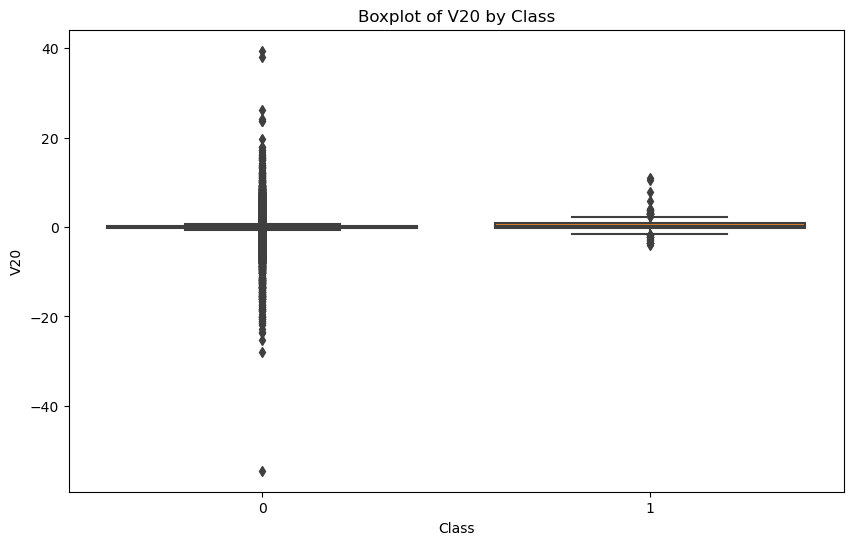

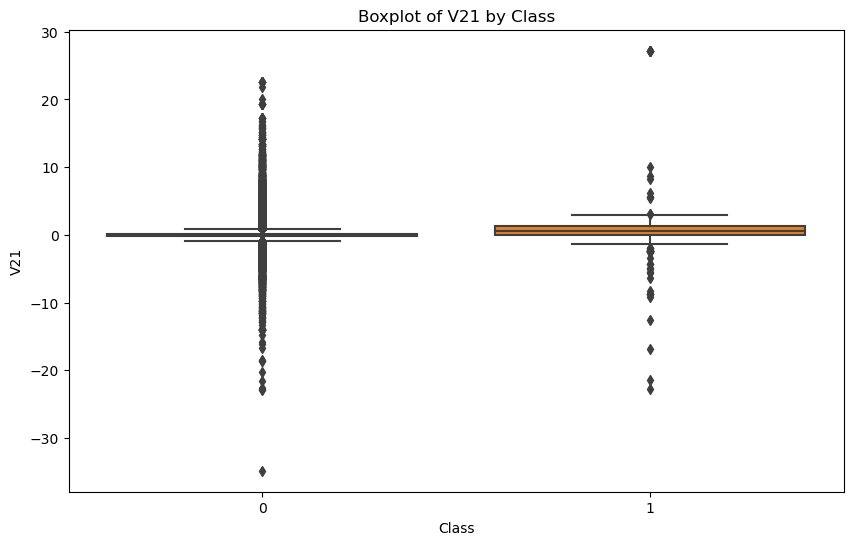

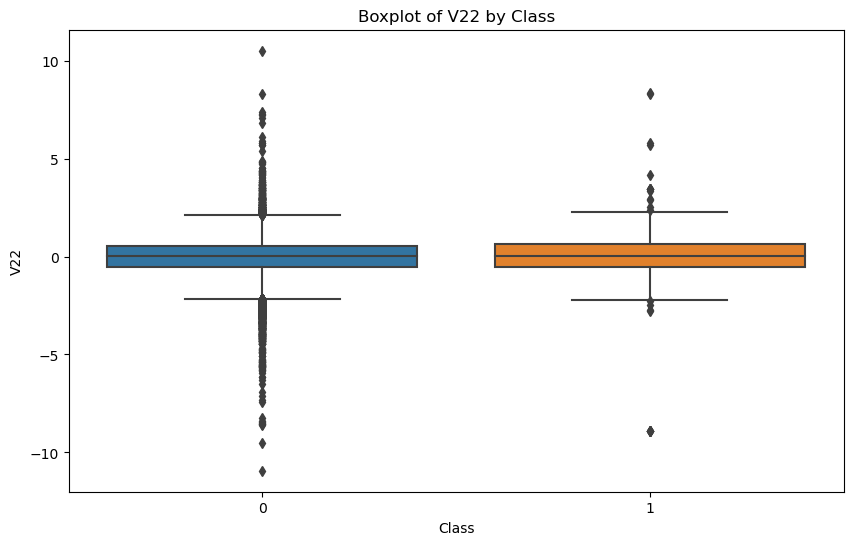

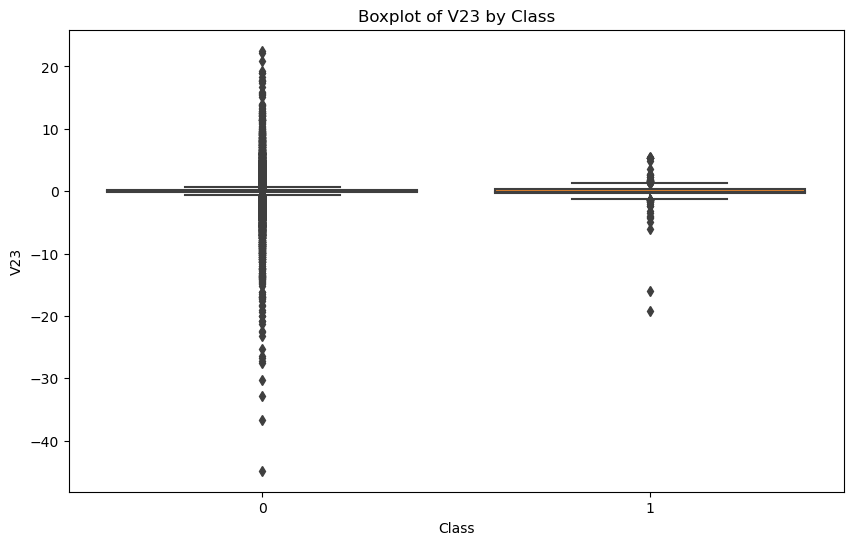

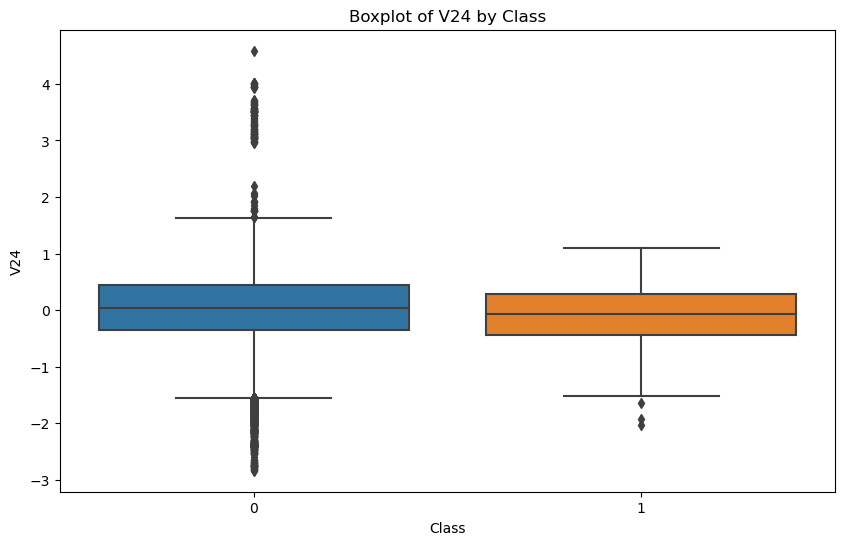

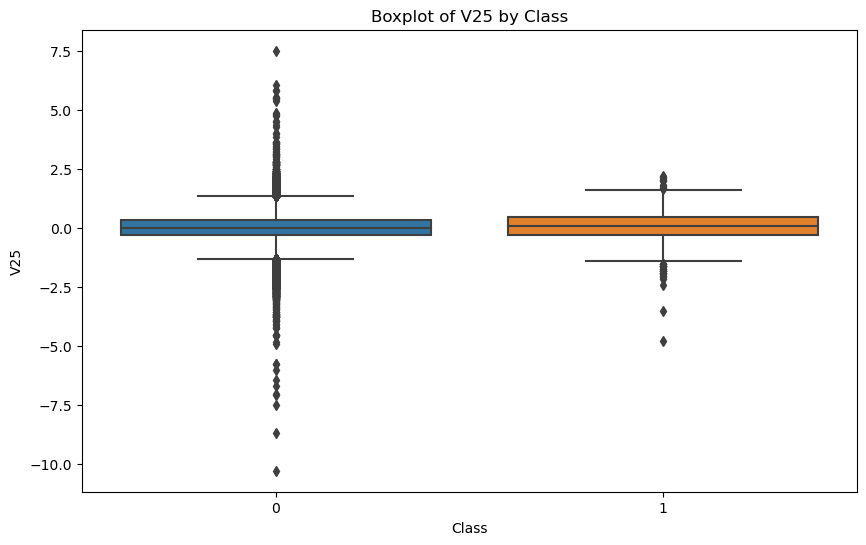

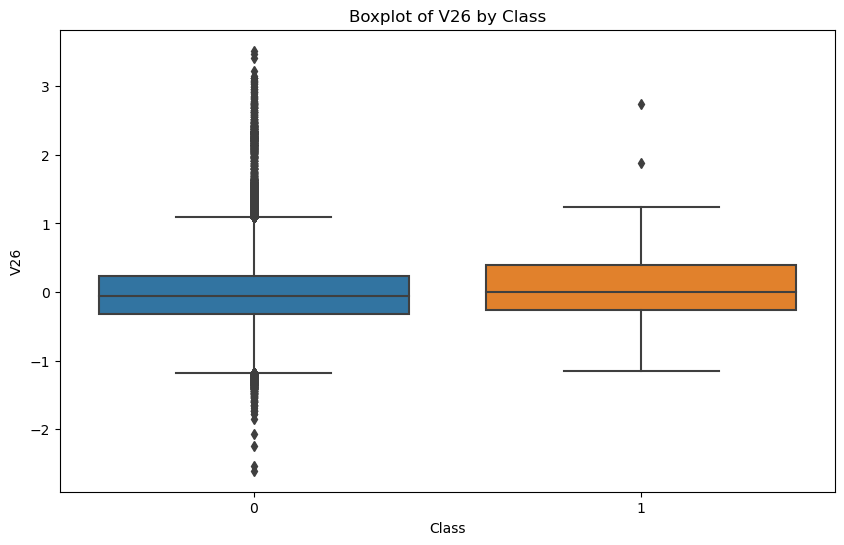

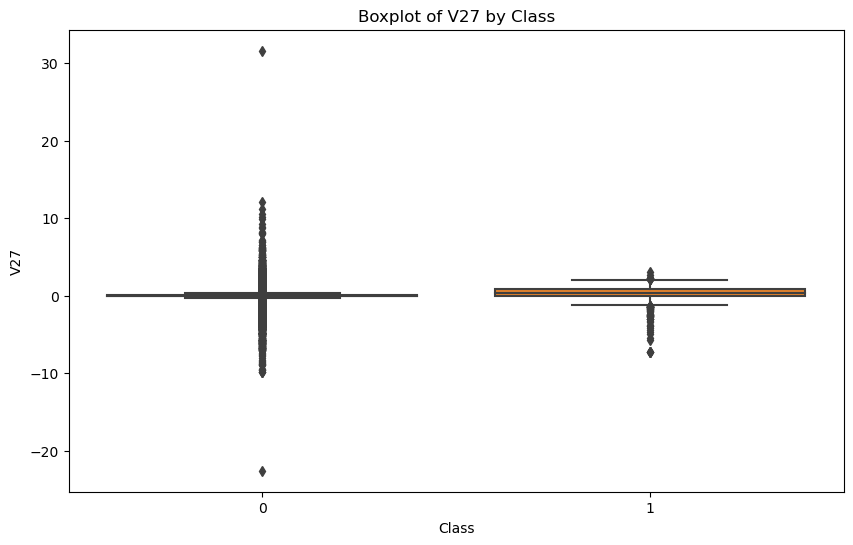

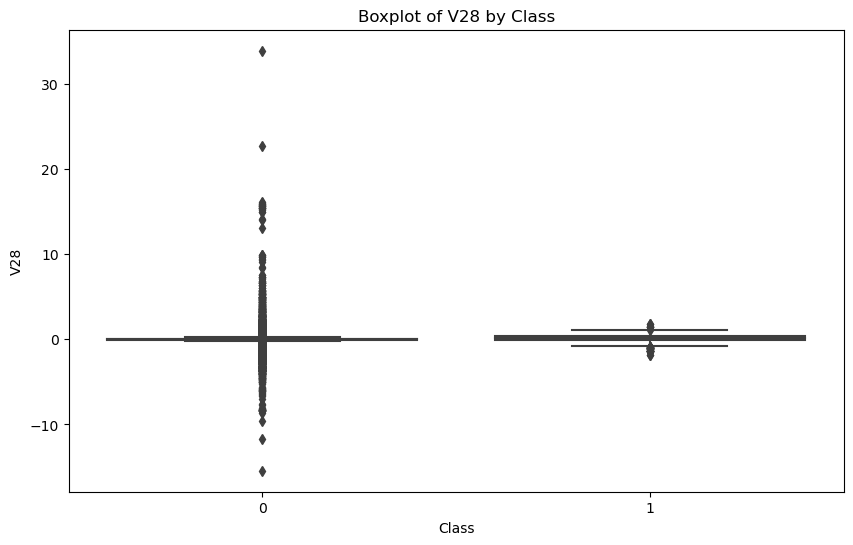

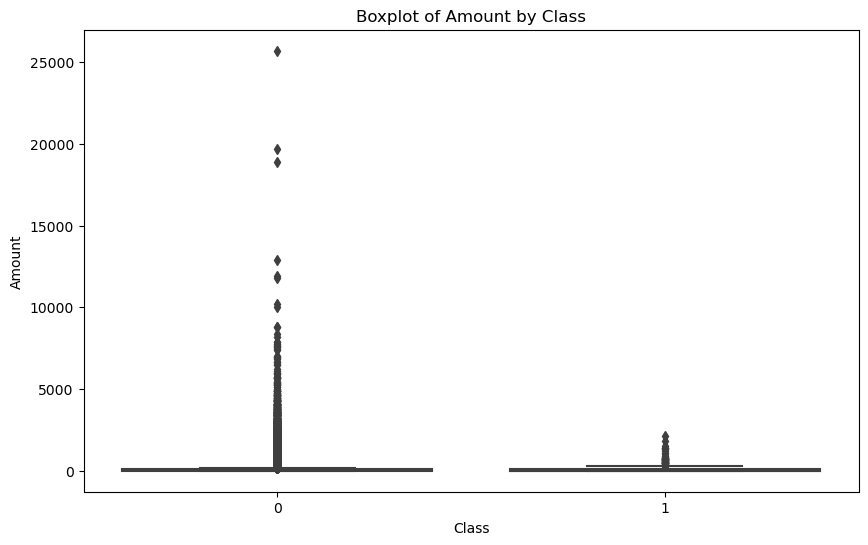

In [8]:
# check distribution of all variables

for column in X_notime.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=column, data=df)
    plt.title(f'Boxplot of {column} by Class')
    plt.show()

In [9]:
# Check normality with D’Agostino-Pearson
from scipy.stats import normaltest

for column in X_notime.columns:
    stat, p = normaltest(X_notime[column])
    print(f'{column}: p={p}')

V1: p=0.0

V2: p=0.0

V3: p=0.0

V4: p=0.0

V5: p=0.0

V6: p=0.0

V7: p=0.0

V8: p=0.0

V9: p=0.0

V10: p=0.0

V11: p=0.0

V12: p=0.0

V13: p=2.4199736295043253e-126

V14: p=0.0

V15: p=0.0

V16: p=0.0

V17: p=0.0

V18: p=0.0

V19: p=0.0

V20: p=0.0

V21: p=0.0

V22: p=0.0

V23: p=0.0

V24: p=0.0

V25: p=0.0

V26: p=0.0

V27: p=0.0

V28: p=0.0

Amount: p=0.0


All **not** normal

In [10]:
# check statistical difference in distributions between 2 classes with mann-whitney
from scipy import stats
from scipy.stats import mannwhitneyu

for column in X_notime.columns:
    class0 = df.loc[df['Class'] == 0, column]
    class1 = df.loc[df['Class'] == 1, column]
    stat, p = stats.mannwhitneyu(class0, class1)
    print(f'{column}: p={p}')

V1: p=1.74078470704578e-113

V2: p=1.6504376983790665e-163

V3: p=1.2110480361161294e-219

V4: p=3.625904437063816e-248

V5: p=3.0537119618414104e-58

V6: p=2.231002470170286e-93

V7: p=1.4642336565270678e-146

V8: p=8.50989149282899e-34

V9: p=8.943723386517164e-154

V10: p=9.611130933483015e-222

V11: p=4.910591830672246e-226

V12: p=8.416026601180421e-247

V13: p=0.051214811167866046

V14: p=1.4715806820794069e-260

V15: p=0.12950821497825638

V16: p=1.8081722832035591e-156

V17: p=9.219384389732435e-124

V18: p=2.6489619761287066e-77

V19: p=2.4019601988224717e-33

V20: p=1.1281043187424568e-30

V21: p=8.673354819194582e-80

V22: p=0.2663946500234552

V23: p=0.007419608511627531

V24: p=9.423065514108417e-07

V25: p=0.012462926236338216

V26: p=0.00353190452220665

V27: p=1.414589041975417e-51

V28: p=1.2036828471902098e-27

Amount: p=8.578472310840218e-06


2 classes are statistically significantly different across all the variables, except for **V13, V15, V22**. We can use this info for feature selection later.

C:\Users\Debbie\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

  return fit_method(estimator, *args, **kwargs)

C:\Users\Debbie\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)


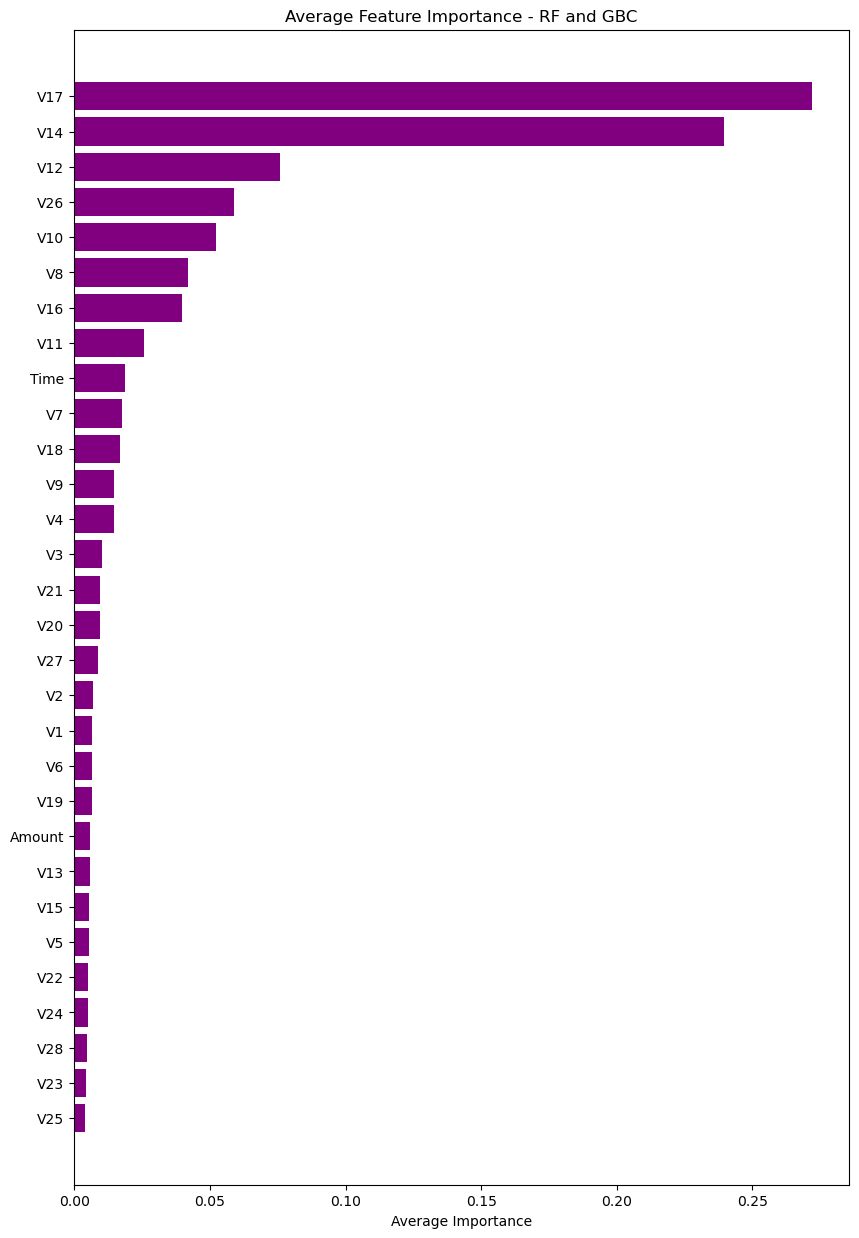

In [11]:
# Check feature importance with RFC and GBC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# RF classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# GB classifier
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X, y)


# get individual feature importance
feature_importance_rf = pd.DataFrame(rf.feature_importances_,
                                     index=X.columns,
                                     columns=['Importance']).sort_values(by='Importance', ascending=False).sort_index()
feature_importance_gbm = pd.DataFrame(gbm.feature_importances_,
                                      index=X.columns,
                                      columns=['Importance']).sort_values(by='Importance', ascending=False).sort_index()

# Calculate average importance and make into a DataFrame
average_importance = (feature_importance_rf['Importance'] + feature_importance_gbm['Importance']) / 2
average_importance_df = pd.DataFrame({'Average Importance': average_importance}).sort_values(by='Average Importance', ascending=False)

# Plot average feature importances
plt.figure(figsize=(10, 15))
plt.barh(average_importance_df.index, average_importance_df['Average Importance'], color='purple')
plt.xlabel('Average Importance')
plt.title('Average Feature Importance - RF and GBC')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

## Supervised learning

### BalancedRandomForestClassifier

In [11]:
# train test split

from sklearn.model_selection import train_test_split

# train test val split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

C:\Users\Debbie\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

  warn(

C:\Users\Debbie\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

  warn(

C:\Users\Debbie\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

  return fit_method(estimator, *args, **kwargs)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best ROC AUC on train: 0.9836652510653486

Brier score: 0.030823887232168046

ROC AUC on test: 0.9781147176794185



***Classification Report***

              precision    recall  f1-score   support



           0       1.00      0.98      0.99     56864

           1       0.06      0.92      0.11        98



    accuracy                           0.98     56962

   macro avg       0.53      0.95      0.55     56962

weighted avg       1.00      0.98      0.99     56962





***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


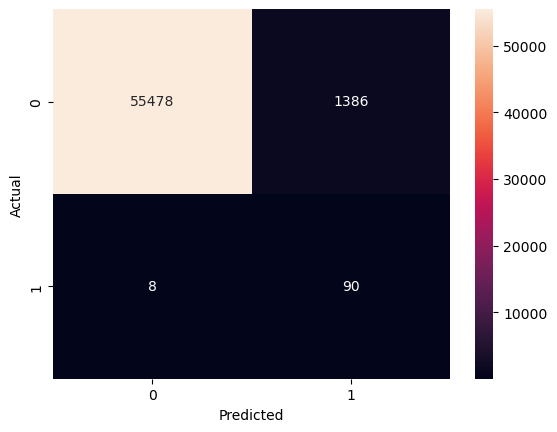

In [209]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV

brf = BalancedRandomForestClassifier(random_state=42)

# define the param grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# grid search
grid_search = GridSearchCV(estimator=brf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
y_pred=grid_search.predict(X_test_scaled)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on train:", grid_search.best_score_)

# Get the probabilistic predictions for the positive class
y_probs = grid_search.predict_proba(X_test_scaled)[:, 1]

# eval
brier_score1 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score1)
roc_auc1 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc1)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred))
report1 = classification_report(y_test, y_pred, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

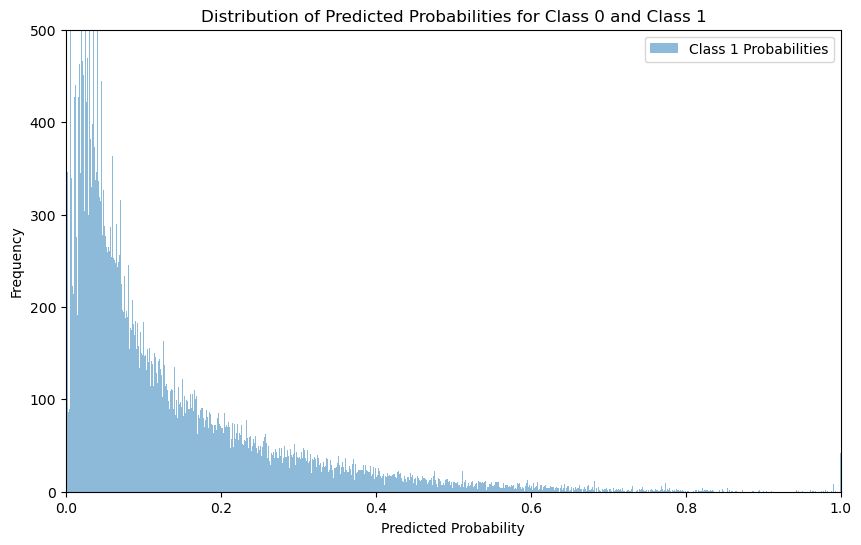

In [213]:
# val set prob class 1
y_val_probs = grid_search.best_estimator_.predict_proba(X_val_scaled)[:, 1]

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)

plt.figure(figsize=(10, 6))

# Plot histogram to see class 1 prob distribution
plt.hist(y_val_probs, bins=1000, alpha=0.5, label='Class 1 Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for Class 0 and Class 1')
plt.legend(loc='best')
plt.ylim(0, 500)
plt.xlim(0, 1)
plt.show()

In [226]:
# Adjust threshold
threshold = 0.24
y_pred_adj = (y_probs > threshold).astype(int)

Brier score: 0.030823887232168046

ROC AUC on test: 0.9781147176794185



***Classification Report***

              precision    recall  f1-score   support



           0       1.00      0.86      0.92     56864

           1       0.01      0.95      0.02        98



    accuracy                           0.86     56962

   macro avg       0.51      0.90      0.47     56962

weighted avg       1.00      0.86      0.92     56962





***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


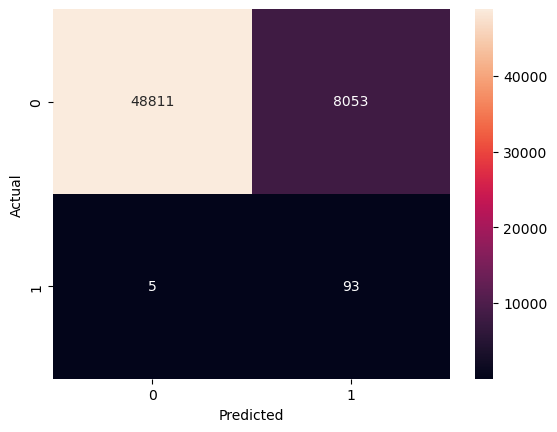

In [227]:
# eval
brier_score1 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score1)
roc_auc1 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc1)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred_adj))
report1 = classification_report(y_test, y_pred_adj, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred_adj, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

- Threshold 0.4: **7** FN **2767** FP
- Threshold 0.33: **6** FN **4495** FP
- Threshold 0.24: **5** FN **8053** FP

When we lower 1 FN, the number of FP doubles.

### XGBoost

In [12]:
import xgboost as xgb

# train test val split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Calculate the ratio of class 0 to class 1
count_class_0, count_class_1 = y_train.value_counts()
scale_pos_weight = count_class_0 / count_class_1

# xgbc with adjusted class weight
xgbc = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Fit the model with early stopping
eval_set = [(X_val_scaled, y_val)]
xgbc.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
y_pred = xgbc.predict(X_test_scaled)

# Get the probabilistic predictions for the positive class
y_probs = xgbc.predict_proba(X_test_scaled)[:, 1]

[0]	validation_0-logloss:0.45134

[1]	validation_0-logloss:0.31273


C:\Users\Debbie\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

  warnings.warn(

C:\Users\Debbie\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

  warnings.warn(


[2]	validation_0-logloss:0.22533

[3]	validation_0-logloss:0.16702

[4]	validation_0-logloss:0.12623

[5]	validation_0-logloss:0.09594

[6]	validation_0-logloss:0.07316

[7]	validation_0-logloss:0.05734

[8]	validation_0-logloss:0.04494

[9]	validation_0-logloss:0.03645

[10]	validation_0-logloss:0.02999

[11]	validation_0-logloss:0.02500

[12]	validation_0-logloss:0.02068

[13]	validation_0-logloss:0.01777

[14]	validation_0-logloss:0.01494

[15]	validation_0-logloss:0.01293

[16]	validation_0-logloss:0.01136

[17]	validation_0-logloss:0.01026

[18]	validation_0-logloss:0.00923

[19]	validation_0-logloss:0.00854

[20]	validation_0-logloss:0.00762

[21]	validation_0-logloss:0.00665

[22]	validation_0-logloss:0.00599

[23]	validation_0-logloss:0.00550

[24]	validation_0-logloss:0.00496

[25]	validation_0-logloss:0.00473

[26]	validation_0-logloss:0.00431

[27]	validation_0-logloss:0.00403

[28]	validation_0-logloss:0.00376

[29]	validation_0-logloss:0.00361

[30]	validation_0-logloss:0.

Brier score: 0.0003274194838285607

ROC AUC on test: 0.9768943874679866



***Classification Report***

              precision    recall  f1-score   support



           0       1.00      1.00      1.00     56864

           1       0.95      0.83      0.89        98



    accuracy                           1.00     56962

   macro avg       0.98      0.91      0.94     56962

weighted avg       1.00      1.00      1.00     56962





***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


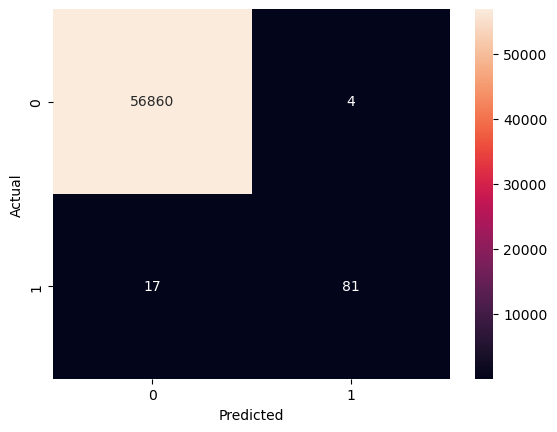

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, roc_auc_score

# eval
brier_score2 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score2)
roc_auc2 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc2)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred))
report2 = classification_report(y_test, y_pred, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

Even though overall False N and P are lower, the FN rate is much higher than BRF. We will try lowering the FN to see how much FP will increase for the trade-off.

In [16]:
# val set probs
probs = xgbc.predict_proba(X_val_scaled)
probs

array([[9.9980617e-01, 1.9385721e-04],
       [9.9999744e-01, 2.5673544e-06],
       [9.9998873e-01, 1.1263484e-05],
       ...,
       [9.9999475e-01, 5.2334294e-06],
       [9.9999350e-01, 6.5111003e-06],
       [9.9992287e-01, 7.7135730e-05]], dtype=float32)

[prob being class 0, prob being class 1]

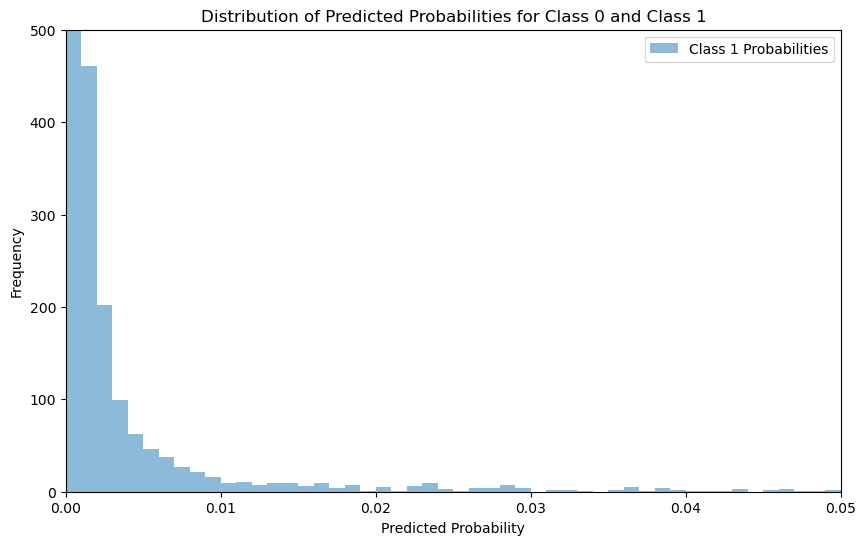

In [17]:
probs_class_1 = probs[:, 1] # class 1 prob

plt.figure(figsize=(10, 6))

# Plot histogram to see class 1 prob distribution
plt.hist(probs_class_1, bins=1000, alpha=0.5, label='Class 1 Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for Class 0 and Class 1')
plt.legend(loc='best')
plt.ylim(0, 500)
plt.xlim(0, 0.05)
plt.show()

In [34]:
# find the threshold with the lowest FN when FP rate doesn't exceed 10% 

from sklearn.metrics import confusion_matrix
import numpy as np

thresholds = [0.001, 0.02, 0.03]

best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_val.values.ravel() == 0)  # 10% of all true negatives

for threshold in thresholds:
    predictions = (probs_class_1 > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val.values.ravel(), predictions).ravel()
    
    # Check if FP is below 10%
    if fp <= max_allowed_FP:
        # If FP is within the limit, best threshold has the smallest FN
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")

Best Threshold: 0.001

Lowest FN (within FP constraint): 9


In [35]:
# Adjust threshold
y_pred_adj = (y_probs > best_threshold).astype(int)

Brier score: 0.0003274194838285607

ROC AUC on test: 0.9768943874679866



***Classification Report***

              precision    recall  f1-score   support



           0       1.00      0.98      0.99     56864

           1       0.07      0.92      0.14        98



    accuracy                           0.98     56962

   macro avg       0.54      0.95      0.56     56962

weighted avg       1.00      0.98      0.99     56962





***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


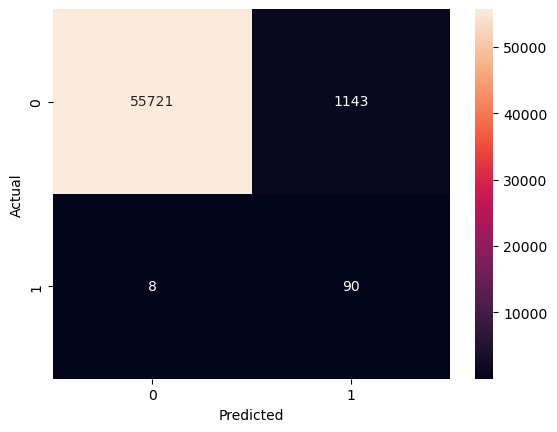

In [36]:
# eval
brier_score2 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score2)
roc_auc2 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc2)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred_adj))
report2 = classification_report(y_test, y_pred_adj, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred_adj, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

Based on the same number of FN = 8, BRF gets 1386 FP, and XGBoost gets 1143, **XGBoost** performs better and is much more efficient.

### MLP

In [406]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [407]:
tf.random.set_seed(42)

In [413]:
X = df.drop('Class', axis=1)
y = df[['Class']]

# train test val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Epoch 1/30

8516/8545 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.9990 - auc_3: 0.9068

Epoch 1: val_loss improved from inf to 0.00295, saving model to best_MLP_model.h5

8545/8545 [==============================] - 17s 2ms/step - loss: 0.0077 - accuracy: 0.9990 - auc_3: 0.9071 - val_loss: 0.0029 - val_accuracy: 0.9995 - val_auc_3: 0.9100

Epoch 2/30

8528/8545 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9993 - auc_3: 0.9420

Epoch 2: val_loss did not improve from 0.00295

8545/8545 [==============================] - 17s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - auc_3: 0.9420 - val_loss: 0.0030 - val_accuracy: 0.9995 - val_auc_3: 0.9230

Epoch 3/30

8529/8545 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9994 - auc_3: 0.9515

Epoch 3: val_loss improved from 0.00295 to 0.00274, saving model to best_MLP_model.h5

8545/8545 [==============================] - 17s 2ms/step - loss: 0.0031 - accuracy: 0.9994 

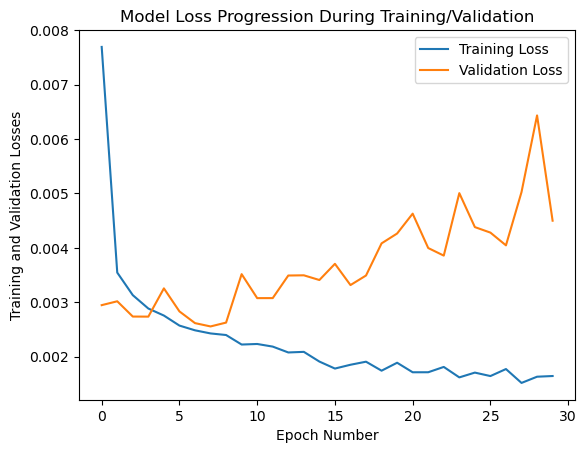

In [416]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

# MLP model
model = Sequential([
    # 1st layer with 32 neurons
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)), 
    # 2nd layer with 32 neurons
    Dense(32, activation='relu'), 
    # add dropout for regularization
    Dropout(0.2),
    # output layer - (1) linear regression: Dense(1, activation='linear') (2) Binary classification: Dense(1, activation='sigmoid') (3) Multiclass: Dense(3, activation='softmax') assuming 3 classes
    Dense(1, activation='sigmoid')
])

# Compile the model (adam lr 0.001 is default)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', AUC()])

# save model with lowest val loss
model_checkpoint_callback = ModelCheckpoint(
    filepath='best_MLP_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',  # The best model is the one which minimizes validation loss
    verbose=1  # Log a message when a better model is found and saved
)

# train model
epochs_hist = model.fit(X_train_scaled, y_train, epochs=30, batch_size=20, verbose=1, validation_data=(X_val_scaled, y_val), callbacks=[model_checkpoint_callback])

# Plot the train and validation loss over each epoch
plt.plot(epochs_hist.history['loss']) # Training loss
plt.plot(epochs_hist.history['val_loss']) # Validation loss
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [417]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_MLP_model.h5')

# Eval test set
test_loss, test_acc, test_auc = model.evaluate(X_test_scaled, y_test, verbose=1)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0031 - accuracy: 0.9995 - auc_3: 0.9434


In [421]:
val_probs = model.predict(X_val_scaled) # class 1 prob

1781/1781 [==============================] - 1s 549us/step


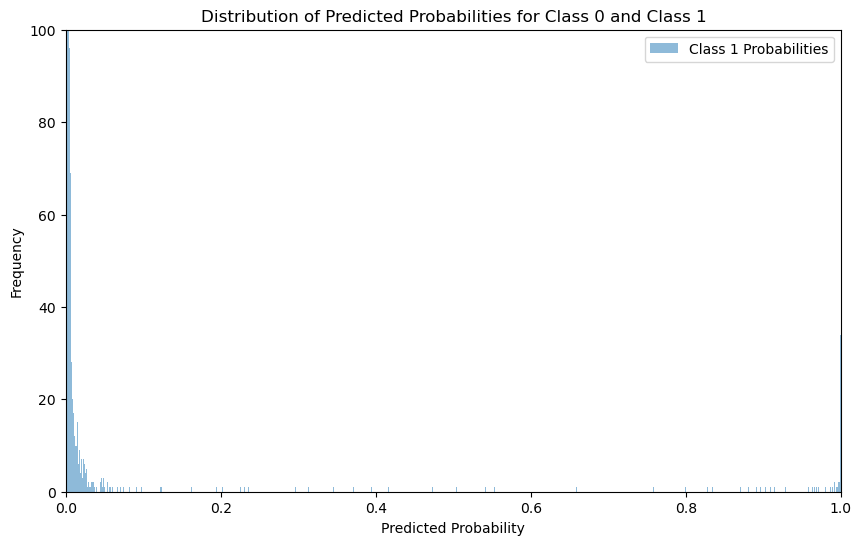

In [422]:
# Determine optimal threshold based on val prob distribution

plt.figure(figsize=(10, 6))

# Plot histogram to see class 1 prob distribution
plt.hist(val_probs, bins=1000, alpha=0.5, label='Class 1 Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for Class 0 and Class 1')
plt.legend(loc='best')
plt.ylim(0, 100)
plt.xlim(0, 1)
plt.show()

In [452]:
# find the threshold with the lowest FN when FP rate doesn't exceed 10% 

from sklearn.metrics import confusion_matrix
thresholds = [0.0001, 0.0009, 0.001, 0.002]

best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_val.values.ravel() == 0)  # 10% of all true negatives

for threshold in thresholds:
    predictions = (val_probs > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val.values.ravel(), predictions).ravel()
    
    # Check if FP is below 10%
    if fp <= max_allowed_FP:
        # If FP is within the limit, best threshold has the smallest FN
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")

Best Threshold: 0.0009

Lowest FN (within FP constraint): 6


1781/1781 [==============================] - 1s 522us/step

Brier score: 0.0004721379872636704

ROC AUC on test: 0.9754702950397942



***Classification Report***

              precision    recall  f1-score   support



           0       1.00      0.97      0.99     56864

           1       0.06      0.92      0.11        98



    accuracy                           0.97     56962

   macro avg       0.53      0.95      0.55     56962

weighted avg       1.00      0.97      0.99     56962





***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


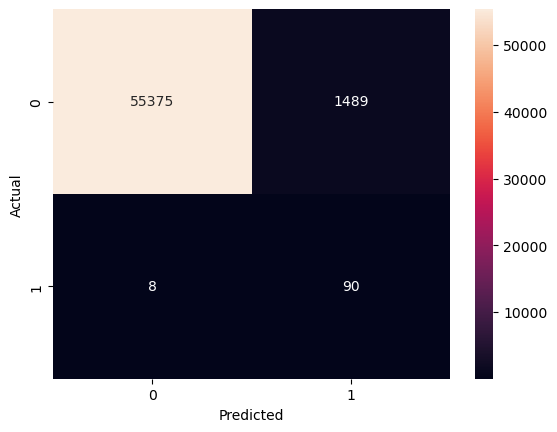

In [453]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score
import numpy as np

# get probabilites
y_probs = model.predict(X_test_scaled).ravel()

# Adjust threshold
y_pred_adj = (y_probs > best_threshold).astype(int)

# eval
brier_score = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score)
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred_adj))
report = classification_report(y_test, y_pred_adj, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred_adj, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

Based on the same number of FN = 8, BRF gets 1386 FP, and XGBoost gets 1143 FP, MLP gets 1489 FP, **XGBoost** still performs better.

## Unsupervised learning

### PCA

Way to detect: **anomalies have a large projection on the least significant principal components**

In [301]:
# train test split

X = df.drop('Class', axis=1)
y = df[['Class']]

from sklearn.model_selection import train_test_split

# train test val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [360]:
from sklearn.decomposition import PCA

# train set
pca = PCA(.95)
pca.fit(X_train_scaled)
X_train_reconstruct = pca.inverse_transform(pca.transform(X_train_scaled))

In [361]:
# test set
pca = PCA(.95)
pca.fit(X_test_scaled)
X_test_reconstruct = pca.inverse_transform(pca.transform(X_test_scaled))

In [362]:
# calculate dif between original and recontructed data
# square them so the dif are positive, easier to compare
# sum up the squared differences
reconstruction_error_train = np.sum(np.square(X_train_scaled - X_train_reconstruct), axis=1)
reconstruction_error_test = np.sum(np.square(X_test_scaled - X_test_reconstruct), axis=1)
reconstruction_error_train

array([0.02030458, 0.51096596, 0.12143004, ..., 0.47377908, 0.69413338,
       0.04392625])

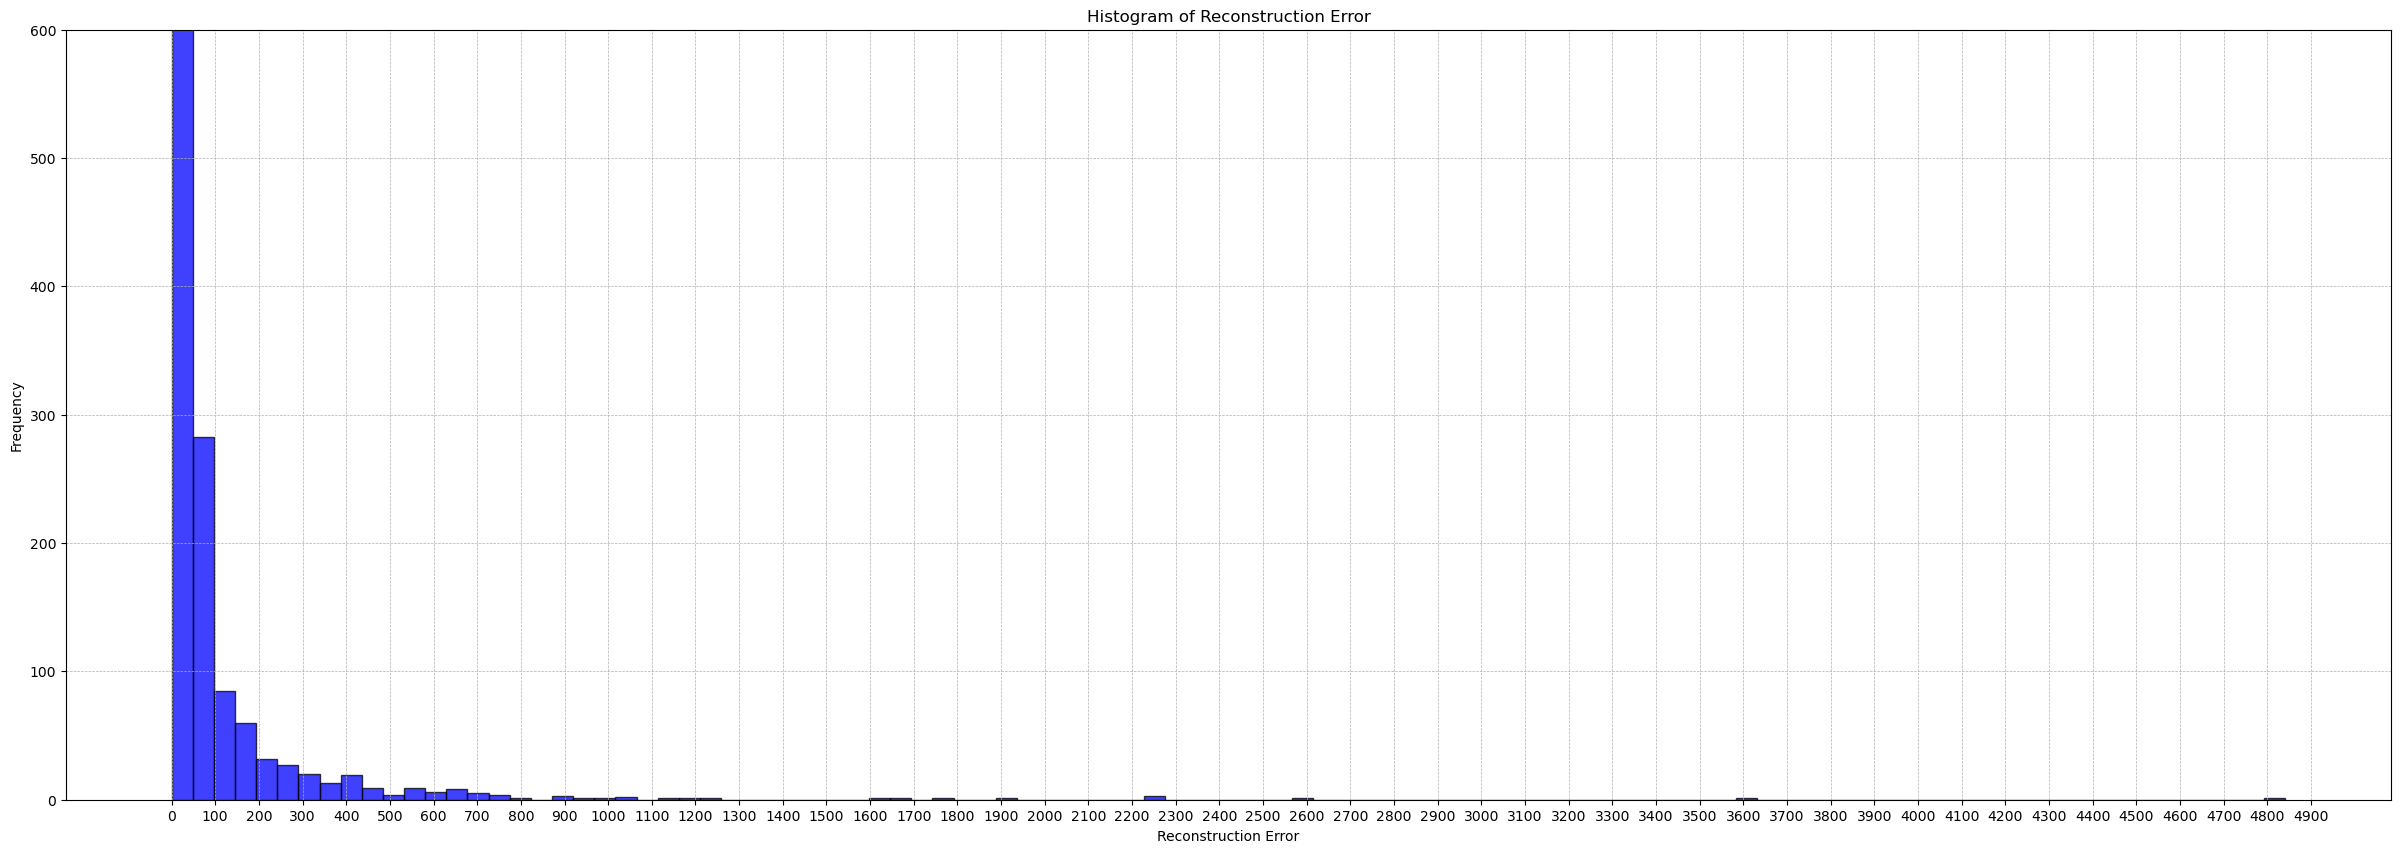

In [363]:
# visualize the distribution

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.hist(reconstruction_error_train, bins=100, alpha=0.75, color='blue', edgecolor='black')
plt.title('Histogram of Reconstruction Error')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,600)
plt.xticks(np.arange(0, 5000, 100))
plt.show()

the tail on the right could be potential anomalies.

Use train set to determine the threshold

In [377]:
# if using 99 percentile as the threshold
threshold = np.percentile(reconstruction_error_train, 99)
anomalies = reconstruction_error_train > threshold
sum(anomalies) # num of anomalies detected

2279

In [370]:
# or use a self-defined threshold
anomalies = reconstruction_error_train > 100
sum(anomalies)

315

In [402]:
# find the threshold with the lowest FN when FP rate doesn't exceed 10% 

from sklearn.metrics import confusion_matrix
percentiles = range(95, 100) # we'll try 95 to 99 percentile
thresholds = [np.percentile(reconstruction_error_train, percentile) for percentile in percentiles]

best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_train.values.ravel() == 0)  # 10% of all true negatives

for threshold in thresholds:
    predictions = np.where(reconstruction_error_train > threshold, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_train.values.ravel(), predictions).ravel()
    
    # Check if FP is below 10%
    if fp <= max_allowed_FP:
        # If FP is within the limit, best threshold has the smallest FN
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")

Best Threshold: 2.7449092896497698

Lowest FN (within FP constraint): 75


***Classification Report***

              precision    recall  f1-score   support



           0       1.00      0.95      0.98     56864

           1       0.01      0.30      0.02        98



    accuracy                           0.95     56962

   macro avg       0.50      0.62      0.50     56962

weighted avg       1.00      0.95      0.97     56962





***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


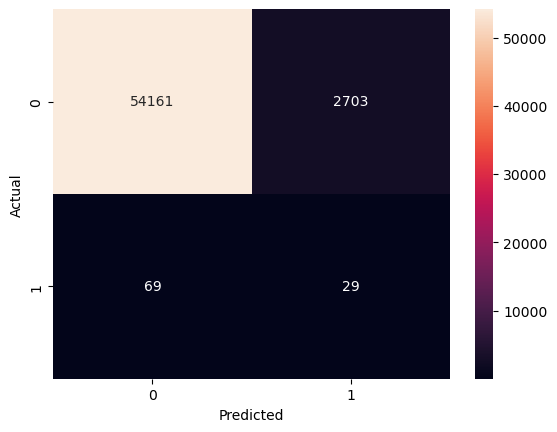

In [403]:
# use this threshold on the test set

test_predictions = np.where(reconstruction_error_test > best_threshold, 1, 0)

# eval
print('***Classification Report***')
print(classification_report(y_test.values.ravel(), test_predictions))
report3 = classification_report(y_test.values.ravel(), test_predictions, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.values.ravel(), test_predictions, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

FN is too high

### Autoencoder

In [454]:
X = df.drop('Class', axis=1)
y = df[['Class']]

# train test val split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# scale 
scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [455]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the strucutre
input_layer = Input(shape=(X_train.shape[1],))
encoder = Dense(32, activation="relu")(input_layer)
decoder = Dense(X_train.shape[1], activation="sigmoid")(encoder)

# initiate model
autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val_scaled, X_val_scaled))

# calculate reconstruction error for val
reconstructed = autoencoder.predict(X_val_scaled)
mse_val = np.mean(np.power(X_val_scaled - reconstructed, 2), axis=1)

Epoch 1/50

668/668 [==============================] - 1s 1ms/step - loss: 0.8792 - val_loss: 0.7105

Epoch 2/50

668/668 [==============================] - 1s 1ms/step - loss: 0.7226 - val_loss: 0.6709

Epoch 3/50

668/668 [==============================] - 1s 1ms/step - loss: 0.6994 - val_loss: 0.6564

Epoch 4/50

668/668 [==============================] - 1s 1ms/step - loss: 0.6878 - val_loss: 0.6472

Epoch 5/50

668/668 [==============================] - 1s 1ms/step - loss: 0.6802 - val_loss: 0.6412

Epoch 6/50

668/668 [==============================] - 1s 1ms/step - loss: 0.6754 - val_loss: 0.6376

Epoch 7/50

668/668 [==============================] - 1s 1ms/step - loss: 0.6728 - val_loss: 0.6357

Epoch 8/50

668/668 [==============================] - 1s 1ms/step - loss: 0.6713 - val_loss: 0.6347

Epoch 9/50

668/668 [==============================] - 1s 1ms/step - loss: 0.6706 - val_loss: 0.6341

Epoch 10/50

668/668 [==============================] - 1s 1ms/step - loss: 0.6701

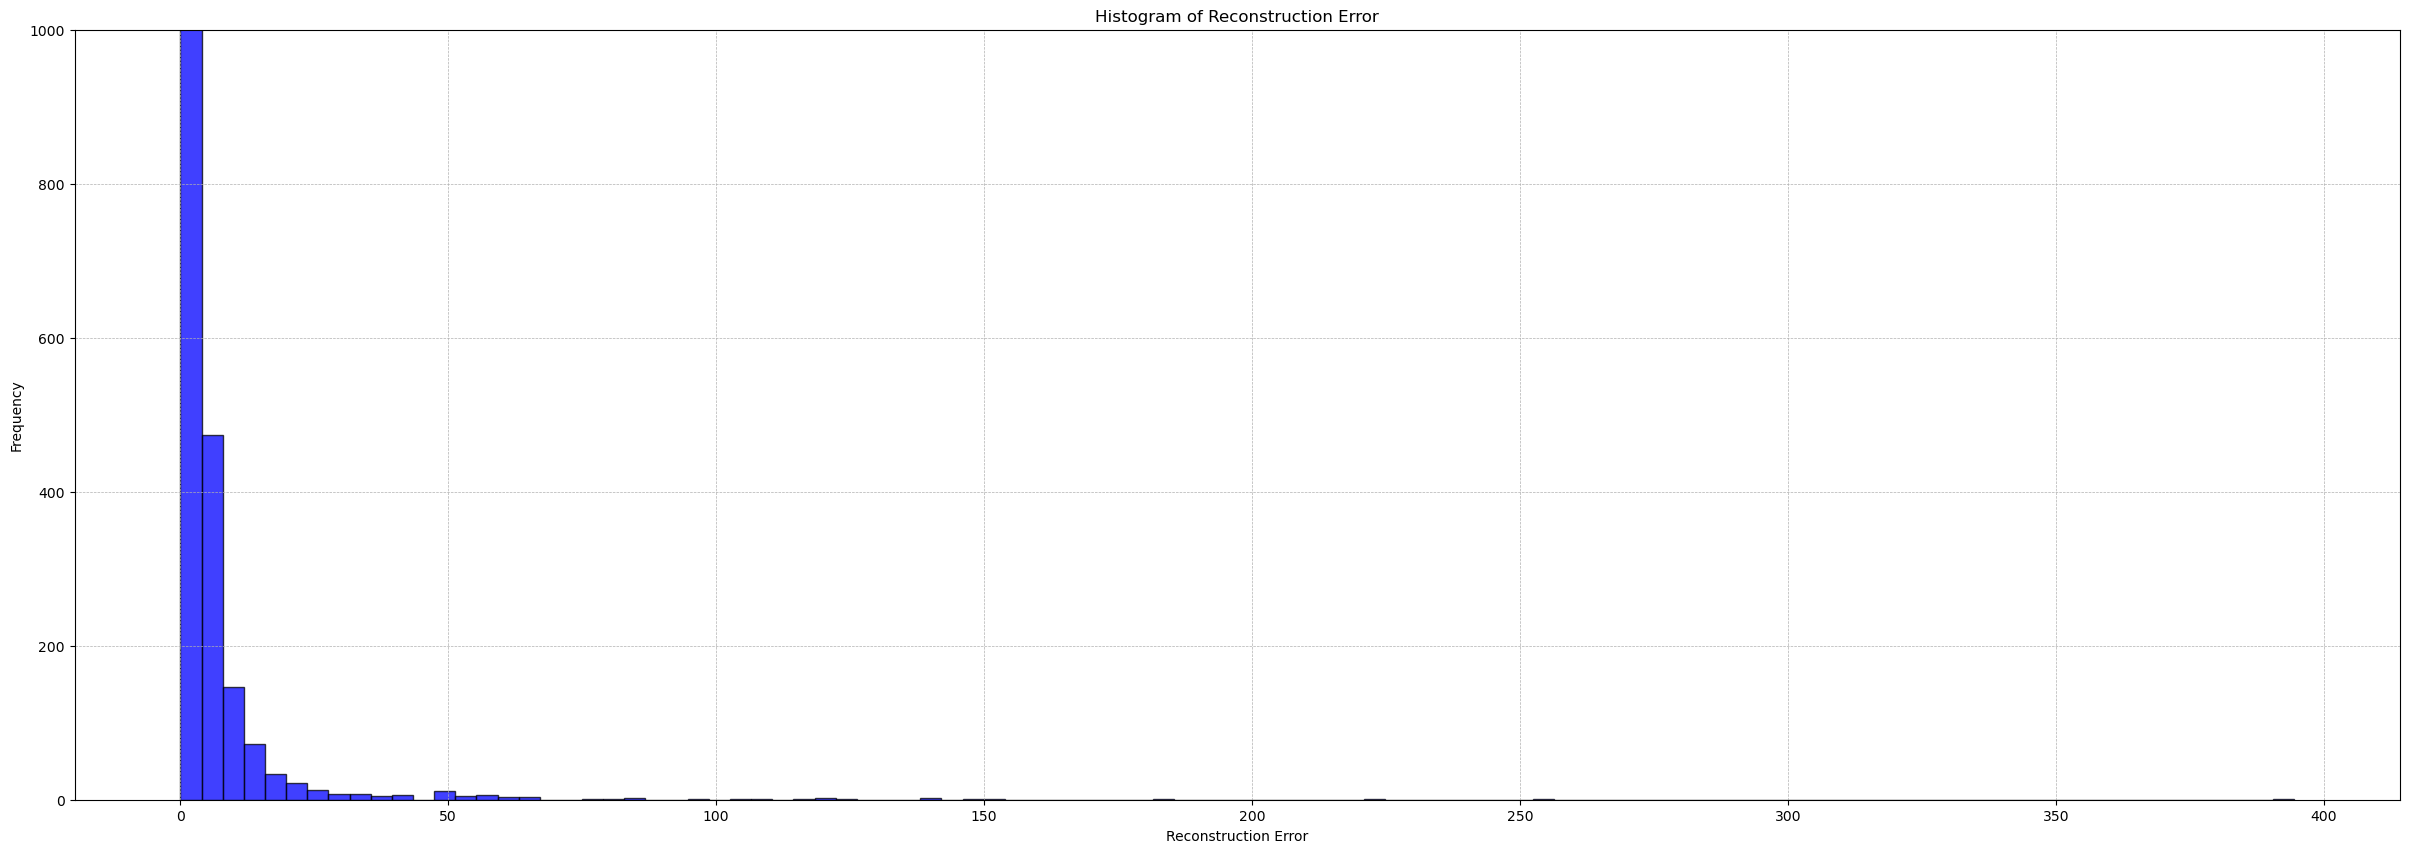

In [461]:
# will use val to determine threshold 
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.hist(mse_val, bins=100, alpha=0.75, color='blue', edgecolor='black')
plt.title('Histogram of Reconstruction Error')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,1000)
plt.show()

In [552]:
# find the threshold with the lowest FN when FP rate doesn't exceed 10% 

from sklearn.metrics import confusion_matrix

thresholds = [1.75]

best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_val.values.ravel() == 0)  # 10% of all true negatives

for threshold in thresholds:
    predictions = np.where(mse_val > threshold, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_val.values.ravel(), predictions).ravel()
    
    # Check if FP is below 10%
    if fp <= max_allowed_FP:
        # If FP is within the limit, best threshold has the smallest FN
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")

Best Threshold: 1.75

Lowest FN (within FP constraint): 12


In [553]:
# calculate reconstruction error for test
reconstructed = autoencoder.predict(X_test_scaled)
mse_test = np.mean(np.power(X_test_scaled - reconstructed, 2), axis=1)

1781/1781 [==============================] - 1s 513us/step


***Classification Report***

              precision    recall  f1-score   support



           0       1.00      0.97      0.98     56864

           1       0.04      0.86      0.08        98



    accuracy                           0.97     56962

   macro avg       0.52      0.91      0.53     56962

weighted avg       1.00      0.97      0.98     56962





***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


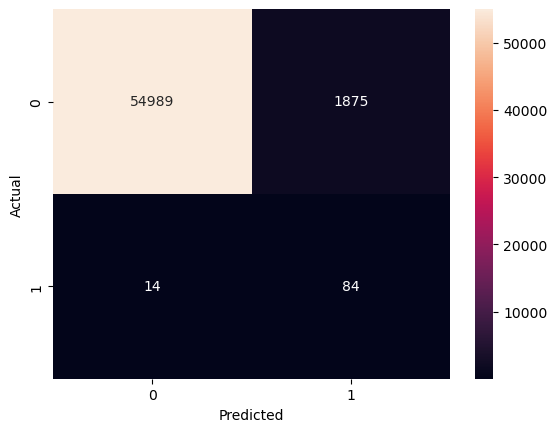

In [554]:
# use this threshold on the test set

test_predictions = np.where(mse_test > best_threshold, 1, 0)

# eval
print('***Classification Report***')
print(classification_report(y_test.values.ravel(), test_predictions))
report3 = classification_report(y_test.values.ravel(), test_predictions, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.values.ravel(), test_predictions, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

In [555]:
14/(14+84) # FN rate

0.14285714285714285

## Feature selection

I wil try on XGboost only

In [37]:
X = df.drop(['Class','V13','V15','V22'], axis=1)
y = df[['Class']]

In [38]:
import xgboost as xgb

# train test val split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Calculate the ratio of class 0 to class 1
count_class_0, count_class_1 = y_train.value_counts()
scale_pos_weight = count_class_0 / count_class_1

# xgbc with adjusted class weight
xgbc = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Fit the model with early stopping
eval_set = [(X_val_scaled, y_val)]
xgbc.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
y_pred = xgbc.predict(X_test_scaled)

# Get the probabilistic predictions for the positive class
y_probs = xgbc.predict_proba(X_test_scaled)[:, 1]

[0]	validation_0-logloss:0.44987

[1]	validation_0-logloss:0.31394

[2]	validation_0-logloss:0.22683

[3]	validation_0-logloss:0.16671


C:\Users\Debbie\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

  warnings.warn(

C:\Users\Debbie\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

  warnings.warn(


[4]	validation_0-logloss:0.12533

[5]	validation_0-logloss:0.09556

[6]	validation_0-logloss:0.07482

[7]	validation_0-logloss:0.05842

[8]	validation_0-logloss:0.04608

[9]	validation_0-logloss:0.03744

[10]	validation_0-logloss:0.03062

[11]	validation_0-logloss:0.02550

[12]	validation_0-logloss:0.02181

[13]	validation_0-logloss:0.01869

[14]	validation_0-logloss:0.01584

[15]	validation_0-logloss:0.01414

[16]	validation_0-logloss:0.01227

[17]	validation_0-logloss:0.01105

[18]	validation_0-logloss:0.00966

[19]	validation_0-logloss:0.00852

[20]	validation_0-logloss:0.00771

[21]	validation_0-logloss:0.00694

[22]	validation_0-logloss:0.00598

[23]	validation_0-logloss:0.00561

[24]	validation_0-logloss:0.00516

[25]	validation_0-logloss:0.00472

[26]	validation_0-logloss:0.00427

[27]	validation_0-logloss:0.00402

[28]	validation_0-logloss:0.00375

[29]	validation_0-logloss:0.00359

[30]	validation_0-logloss:0.00340

[31]	validation_0-logloss:0.00326

[32]	validation_0-logloss:

Brier score: 0.0002977323830784181

ROC AUC on test: 0.975186230232104



***Classification Report***

              precision    recall  f1-score   support



           0       1.00      1.00      1.00     56864

           1       0.95      0.86      0.90        98



    accuracy                           1.00     56962

   macro avg       0.98      0.93      0.95     56962

weighted avg       1.00      1.00      1.00     56962





***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


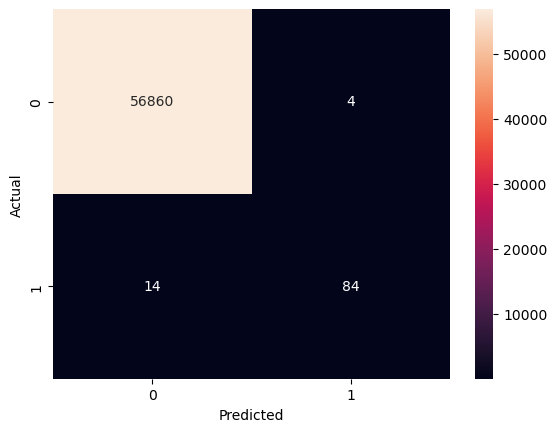

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, roc_auc_score

# eval
brier_score2 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score2)
roc_auc2 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc2)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred))
report2 = classification_report(y_test, y_pred, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

Slightly better than before dimension reduction

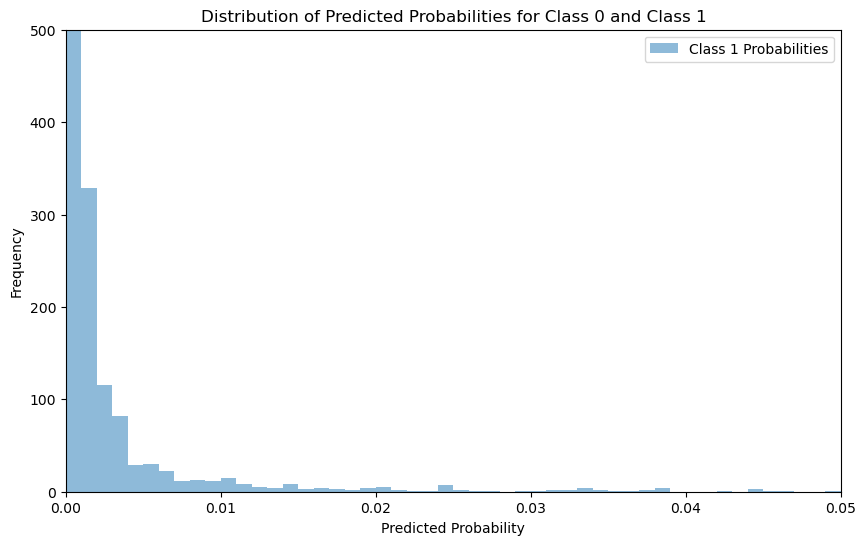

In [41]:
probs = xgbc.predict_proba(X_val_scaled) # val set probs
probs_class_1 = probs[:, 1] # class 1 prob

plt.figure(figsize=(10, 6))

# Plot histogram to see class 1 prob distribution
plt.hist(probs_class_1, bins=1000, alpha=0.5, label='Class 1 Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for Class 0 and Class 1')
plt.legend(loc='best')
plt.ylim(0, 500)
plt.xlim(0, 0.05)
plt.show()

In [69]:
# find the threshold with the lowest FN when FP rate doesn't exceed 10% 

from sklearn.metrics import confusion_matrix
import numpy as np

thresholds = [0.001, 0.002, 0.003, 0.004] 

best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_val.values.ravel() == 0)  # 10% of all true negatives

for threshold in thresholds:
    predictions = (probs_class_1 > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val.values.ravel(), predictions).ravel()
    
    # Check if FP is below 10%
    if fp <= max_allowed_FP:
        # If FP is within the limit, best threshold has the smallest FN
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")

Best Threshold: 0.001

Lowest FN (within FP constraint): 9


In [70]:
# Adjust threshold
y_pred_adj = (y_probs > best_threshold).astype(int)

Brier score: 0.0002977323830784181

ROC AUC on test: 0.975186230232104



***Classification Report***

              precision    recall  f1-score   support



           0       1.00      0.99      0.99     56864

           1       0.11      0.93      0.19        98



    accuracy                           0.99     56962

   macro avg       0.55      0.96      0.59     56962

weighted avg       1.00      0.99      0.99     56962





***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


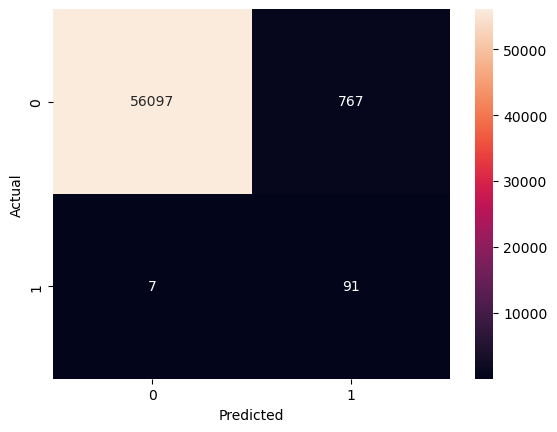

In [71]:
# eval
brier_score2 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score2)
roc_auc2 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc2)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred_adj))
report2 = classification_report(y_test, y_pred_adj, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred_adj, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

Result comparison:
- before DR: **8** FN + **1143** FP
- after DR: **7** FN + **767** FP

Dimension reduction further improved the prediction.

## Conclusion

Supervised learning method, specifically **XGboost**, overall performs better, adding **dimension reduction** the model was able to make more accurate predictions. **Autoencoder** is the best among all the unsupervised techniques I tried, but still not performing nearly as well as the supervised methods.